# Prepare Uniform Superposition

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `PrepareUniformSuperposition`
Prepares a uniform superposition over first $n$ basis states using $O(log(n))$ T-gates.

Performs a single round of amplitude amplification and prepares a uniform superposition over
the first $n$ basis states $|0>, |1>, ..., |n - 1>$. The expected T-complexity should be
$10 * log(L) + 2 * K$ T-gates and $2$ single qubit rotation gates, where $n = L * 2^K$.

However, the current T-complexity is $12 * log(L)$ T-gates and $2 + 2 * (K + log(L))$ rotations
because of two open issues:
 - https://github.com/quantumlib/Qualtran/issues/233 and
 - https://github.com/quantumlib/Qualtran/issues/235

#### Parameters
 - `n`: The gate prepares a uniform superposition over first $n$ basis states.
 - `cvs`: Control values for each control qubit. If specified, a controlled version of the gate is constructed. 

#### References
 - [Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity](https://arxiv.org/abs/1805.03662). Fig 12.


In [2]:
from qualtran.bloqs.state_preparation import PrepareUniformSuperposition

### Example Instances

In [3]:
prep_uniform = PrepareUniformSuperposition(n=5)

In [4]:
c_prep_uniform = PrepareUniformSuperposition(n=5, cvs=[1])

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([prep_uniform, c_prep_uniform],
           ['`prep_uniform`', '`c_prep_uniform`'])

### Call Graph

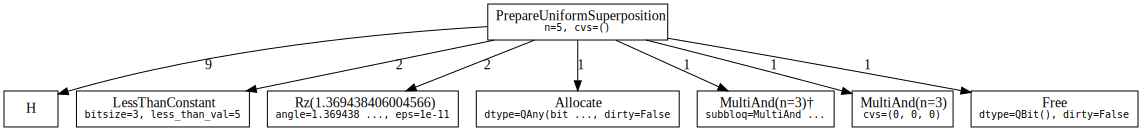

#### Counts totals:
 - `Adjoint(subbloq=MultiAnd(n=3))`: 1
 - `Allocate`: 1
 - `Free`: 1
 - `H`: 9
 - `LessThanConstant`: 2
 - `MultiAnd(n=3)`: 1
 - `Rz(1.369438406004566)`: 2

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
prep_uniform_g, prep_uniform_sigma = prep_uniform.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(prep_uniform_g)
show_counts_sigma(prep_uniform_sigma)